#### GUI Development

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk

from data.graph_data import *
from ba_utils.visualization import draw_rug_from_graphs
from ba_utils.orderings import get_priority_bfs_ordering


In [ ]:
widgets.IntSlider()

a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

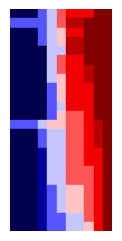

In [ ]:
def draw_networkrug(graphs, color_encoding='closeness_centrality', labels=False, pixel_size=6):
    """
    Draws a single NetworkRug with a specific color encoding and pixel size.
    Adjusts figure size dynamically to support scalability in node/time dimensions.
    """
    ordering = get_priority_bfs_ordering(graphs)

    fig = draw_rug_from_graphs(
        graphs_data=graphs,
        ordering=ordering,
        color_encoding=color_encoding,
        labels=labels,
        pixel_size=pixel_size
    )
    return fig

draw_networkrug(merge_graphs, color_encoding='closeness_centrality', labels=False, pixel_size=12)

In [ ]:
def interactive_rug(graphs):
    color_options = ['id', 'id2', 'id3', 'degree_centrality', 'closeness_centrality', 'eigenvector_centrality']
    color_dropdown = widgets.Dropdown(options=color_options, value='closeness_centrality', description='Color:')
    label_toggle = widgets.Checkbox(value=False, description='Show Labels')
    
    pixel_slider = widgets.IntSlider(
        value=6,
        min=2,
        max=20,
        step=1,
        description='Pixel Size:',
        continuous_update=False
    )

    ui = widgets.VBox([widgets.HBox([color_dropdown, label_toggle, pixel_slider])])

    def update_plot(change=None):
        draw_networkrug(
            graphs,
            color_encoding=color_dropdown.value,
            labels=label_toggle.value,
            pixel_size=pixel_slider.value
        )

    # Register observers
    color_dropdown.observe(update_plot, names='value')
    label_toggle.observe(update_plot, names='value')
    pixel_slider.observe(update_plot, names='value')

    display(ui)
    update_plot()
    
interactive_rug(merge_graphs)


In [11]:
root = tk.Tk()

label1 = tk.Label(root, text="Hallo World!")
label1.pack()

root.mainloop()

In [ ]:
#main functionality in network_rugs.py
import ba_utils.network_rugs as nrugs

nrugs.launch_tkinter_ui(merge_graphs)